In [125]:
import pandas as pd 
#definindo a formação de floas para 2 casa decimais
pd.options.display.float_format = "{:,.2f}".format
#lendo o arquivo e criando o dataframe
outliers = pd.read_pickle('outliers.pkl')
display(outliers)

,Nome completo,Cargo Base,Cargo em Comissão,Remuneração do Mês,Demais Elementos da Remuneração,Remuneração Bruta,Unidade,Jornada,Data
0,ADENIZE CONRADO DOS SANTOS,,ASSESSOR,"2,546.86",923.46,"3,470.32",GABINETE DO PREFEITO,40.00,01-2017
1,ADILSON TRAJAI,ASSISTENTE DE GESTAO DE POLITICAS PUBLICAS NIV...,NaN,"2,707.60","1,030.84","3,738.44",GABINETE DO PREFEITO,40.00,01-2017
2,ADRIANA CHAHIN CAROPRESO,,ASSISTENTE TECNICO II,"3,077.73","1,036.06","4,113.79",SECRETARIA DO GOVERNO MUNICIPAL,40.00,01-2017
3,ALBERTINA FLORENTINO DE SOUZA,AGENTE DE APOIO NIVEL I,ASSISTENTE TECNICO I,"2,090.47",771.46,"2,861.93",SECRETARIA DO GOVERNO MUNICIPAL,40.00,01-2017
4,ALEXANDRA ELIAS,,ENCARREGADO DE EQUIPE I,"1,306.82",899.23,"2,206.05",SECRETARIA DO GOVERNO MUNICIPAL,40.00,01-2017
...,...,...,...,...,...,...,...,...,...
3750513,RENATA LUCENA DE MORAES PACHECO,,ASSESSOR III,"5,670.56",1050,"6,720.56",DIVISAO DE FOMENTO AO TURISMO,40.00,12-2023
3750514,ROGERIO MARCOS DA SILVA,,ASSESSOR II,"3,780.37","1,476.30","5,256.67",ASSESSORIA TECNICA,40.00,12-2023
3750515,THIAGO CROCCO DE CAMARGO,,ASSESSOR IV,"7,560.75",945,"8,505.75",GABINETE DO SECRETARIO,40.00,12-2023
3750516,VANESSA SANTOS DA FRANCA,,ASSESSOR III,"5,670.56","1,743.07","7,413.63",DIVISAO DE GESTAO DE PESSOAS,40.00,12-2023


In [143]:
#convertendo a coluna para datetime, para que seja possivel extrair o ano e realizar o agrupamento
outliers['Data'] = pd.to_datetime(outliers['Data'])
#criando um novo dataaframe agrupado com o ANO e a QUANTIDADE DE OUTLIERS naquele ano
teste_out = outliers.groupby(outliers['Data'].dt.year).size().reset_index()
#renomeando a coluna
teste_out.rename(columns = {0:'Quantidade de Outliers', 'Data':'Ano'}, inplace = True)
#transoformando a quantidade de outliers em float
teste_out['Quantidade de Outliers'] = teste_out['Quantidade de Outliers'].astype(float)
#utilizando a função pct_change() para realizar o calculo de porcetagem e valores sequenciais e  * 100 para transformar em porcentagem
teste_out['Percentual de variação'] = teste_out['Quantidade de Outliers'].pct_change() * 100
#filtando o primeiro ano para 0.0%
teste_out['Percentual de variação'].fillna(0, inplace = True)
#aplicando a função lambada para formatar o valores para a porcentagem
teste_out['Percentual de variação'] = teste_out['Percentual de variação'].apply(lambda x: f'{x:.1f}')
#transforma a coluna em float para poder exibir no gráfico
teste_out['Percentual de variação'] = teste_out['Percentual de variação'].str.replace('%', '').astype(float)

C:\Users\brito\AppData\Local\Temp\ipykernel_1656\3461052866.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  teste_out['Percentual de variação'].fillna(0, inplace = True)


In [129]:
#printando o dataframe, com a data, quantidade de outliers por ano e o percentual de variação comparando os anos
display(teste_out)

,Ano,Quantidade de Outliers,Percentual de variação
0,2017,"510,957.00",0.0%
1,2018,"482,273.00",-5.6%
2,2019,"467,398.00",-3.1%
3,2020,"638,374.00",36.6%
4,2021,"638,374.00",0.0%
5,2022,"537,816.00",-15.8%
6,2023,"475,326.00",-11.6%


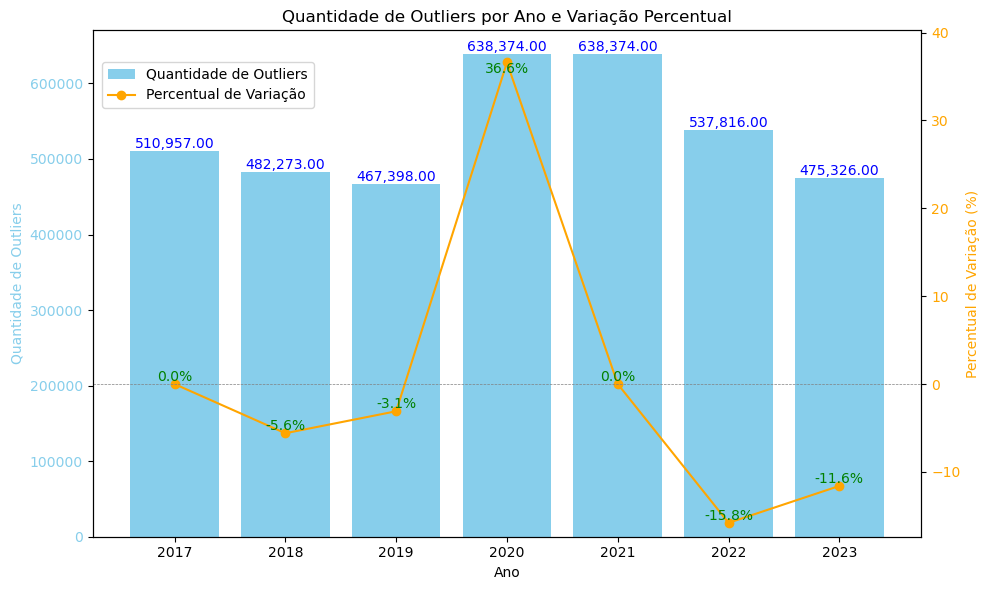

In [172]:
import matplotlib.pyplot as plt

# Configuração do gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para a quantidade de outliers
bars = ax1.bar(teste_out['Ano'], teste_out['Quantidade de Outliers'], color='skyblue', label='Quantidade de Outliers')

# Adicionar rótulos nas barras (quantidade exata de outliers, com 2 casas decimais)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.2f}', ha='center', va='bottom', color='blue', fontsize=10)

ax1.set_xlabel('Ano')
ax1.set_ylabel('Quantidade de Outliers', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Configuração do segundo eixo y para o percentual de variação
ax2 = ax1.twinx()
line, = ax2.plot(teste_out['Ano'], teste_out['Percentual de variação'], color='orange', marker='o', label='Percentual de Variação')

# Adicionar rótulos de percentual ao longo da linha, agora na parte inferior e com cor diferente
for i, txt in enumerate(teste_out['Percentual de variação']):
    ax2.text(teste_out['Ano'][i], txt, f'{txt:.1f}%', color='green', ha='center', va='top' if txt > 0 else 'bottom', fontsize=10)

# Linha horizontal no 0% para separar aumentos e reduções
ax2.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Configuração do eixo y para acomodar valores negativos e positivos
ax2.set_ylabel('Percentual de Variação (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Definindo os limites do eixo y com base nos valores mínimo e máximo do percentual de variação
min_variacao = min(0, teste_out['Percentual de variação'].min() * 1.1)
max_variacao = max(0, teste_out['Percentual de variação'].max() * 1.1)
ax2.set_ylim(min_variacao, max_variacao)

# Título do gráfico
plt.title('Quantidade de Outliers por Ano e Variação Percentual')

# Adicionar a legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Ajuste do layout e exibição do gráfico
fig.tight_layout()
plt.show()

In [177]:
#salvar o grafico em png
fig.savefig('grafico_outliers.png', bbox_inches='tight')

# Ou salvar em formato PDF
fig.savefig('grafico_outliers.pdf', bbox_inches='tight')